In [1]:
'''
Basic demonstration of the capabilities of the CRNN using TimeDistributed layers
Processes an MNIST image (or blank square) at each time step and sums the digits.
Learning is based on the sum of the digits, not explicit labels on each digit.
'''

from __future__ import print_function
import numpy as np

import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.optimizers import RMSprop, Adadelta, Adam
# from keras.layers.convolutional import Convolution2D
from keras.layers import Conv2D
from keras.layers.core import Dense, Activation, Dropout, Reshape, Flatten
from keras.layers.wrappers import TimeDistributed
from keras.models import model_from_json

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# for reproducibility
np.random.seed(2016)  
K.set_image_dim_ordering('tf')
#define some run parameters
batch_size      = 128
nb_epochs       = 1
examplesPer     = 60000
maxToAdd        = 8
hidden_units    = 200
size            = 28
#cutoff          = 1000

In [3]:
# the data, shuffled and split between train and test sets
(X_train_raw, y_train_temp), (X_test_raw, y_test_temp) = mnist.load_data()

#basic image processing
X_train_raw = X_train_raw.astype('float32')
X_test_raw  = X_test_raw.astype('float32')
X_train_raw /= 255
X_test_raw  /= 255


print('X_train_raw shape:', X_train_raw.shape)
print(X_train_raw.shape[0], 'train samples')
print(X_test_raw.shape[0], 'test samples')

X_train_raw shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
X_train       = []
y_train       = []
X_test        = []
y_test        = []

X_train     = np.zeros((examplesPer,maxToAdd,size,size,1))

for i in range(0, examplesPer):
    #initialize a training example of max_num_time_steps, im_size, im_size
    output      = np.zeros((maxToAdd,size,size,1))
    #decide how many MNIST images to put in that tensor
    numToAdd    = int(np.ceil(np.random.rand()*maxToAdd))
    #sample that many images
    indices     = np.random.choice(X_train_raw.shape[0],size=numToAdd)
    example     = X_train_raw[indices]
    #sum up the outputs for new output
    exampleY    = y_train_temp[indices]
    output[0:numToAdd,:,:,0] = example
    X_train[i,:,:,:,:] = output
    y_train.append(np.sum(exampleY))

y_train     = np.array(y_train)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)

#Test the model
X_test     = np.zeros((examplesPer,maxToAdd,size,size,1))
for i in range(0,examplesPer):
    output      = np.zeros((maxToAdd,size,size,1))
    numToAdd    = int(np.ceil(np.random.rand()*maxToAdd))
    indices     = np.random.choice(X_test_raw.shape[0],size=numToAdd)
    example     = X_test_raw[indices]
    exampleY    = y_test_temp[indices]
    output[0:numToAdd,:,:,0] = example
    X_test[i,:,:,:,:] = output
    y_test.append(np.sum(exampleY))

X_test  = np.array(X_test)
y_test  = np.array(y_test)

print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (60000, 8, 28, 28, 1)
y_train shape:  (60000,)
X_test shape:  (60000, 8, 28, 28, 1)
y_test shape:  (60000,)


In [ ]:
#define our time-distributed setup
model = Sequential()
model.add(TimeDistributed(Conv2D(8, (4, 4), padding='valid'), input_shape=(maxToAdd, size, size, 1)))
model.add(Activation('relu'))
model.add(TimeDistributed(Conv2D(16, (3, 3), padding='valid')))
model.add(Activation('relu'))
model.add(TimeDistributed(Flatten()))
model.add(Activation('relu'))
model.add(GRU(units=100, return_sequences=True))
model.add(GRU(units=50, return_sequences=False))
model.add(Dropout(.2))
model.add(Dense(1))

print(model.summary())

In [ ]:
adam = Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

In [ ]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=5,
              verbose=1)    

# preds   = model.predict(X_test)

# #print the results of the test
# print(np.sum(np.sqrt(np.mean([ (y_test[i] - preds[i][0])**2 for i in range(0,len(preds)) ]))))
# print("naive guess", np.sum(np.sqrt(np.mean([ (y_test[i] - np.mean(y_test))**2 for i in range(0,len(y_test)) ]))))

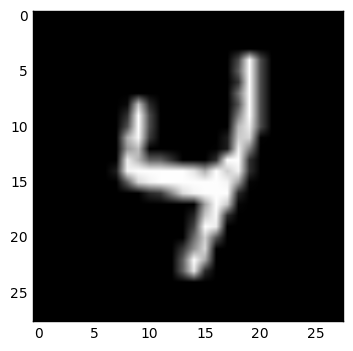

6


(28, 28)

In [51]:
plt.imshow(example[0], cmap='gray')
plt.show()

print(exampleY[0])

example[0].shape

In [11]:
def loadThatModel(folder):
    with open(folder+".json",'r') as f:
        json_string     = f.read()
    model = model_from_json(json_string)
    model.load_weights(folder+".h5")
    return model

In [12]:
model   = loadThatModel("./model/basicRNN")

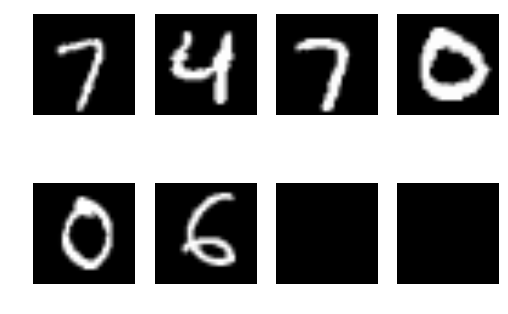

24 ~ 23.9555


In [60]:
indx = int(np.ceil(np.random.rand()*examplesPer))
test_ins = X_test[indx]

# fig, ax = plt.subplots(nrows=2,ncols=4)

img_indx = 0
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

img_indx += 1
plt.subplot(2, 4, img_indx + 1)
plt.axis('off')
plt.imshow(X_test[indx][img_indx][:, :, 0], cmap='gray')

plt.show()

test_ins = np.expand_dims(test_ins, axis=0)

preds = model.predict(test_ins)
print(str(y_test[indx]) + ' ~ ' + str(preds[0][0]))

In [22]:
# #save the model
# jsonstring = model.to_json()
# with open("./model/basicRNN.json",'w') as f:
#    f.write(jsonstring)
# model.save_weights("./model/basicRNN.h5",overwrite=True)